In [92]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [93]:
sns.set(
    font_scale=2,
    style = 'whitegrid',
    rc ={'figure.figsize':(18, 7)}
)

In [94]:
sales_team = pd.read_csv('https://stepik.org/media/attachments/lesson/383540/sales_team.csv')

In [96]:
order_leads = pd.read_csv('https://stepik.org/media/attachments/lesson/383540/order_leads.csv')

In [97]:
invoices = pd.read_csv('https://stepik.org/media/attachments/lesson/383540/invoices.csv')

In [98]:
sales_team.head()

,Sales Rep,Sales Rep Id,Company Name,Company Id
0,William Taylor,ZTZA0ZLYZR85PTUJ,Melancholy Social-Role,D0AUXPP07H6AVSGD
1,William Taylor,ZTZA0ZLYZR85PTUJ,Pee-Wee Pigeon,TJW99R4RWH02INII
2,William Taylor,ZTZA0ZLYZR85PTUJ,Vaginal 36-Year-Old,3S20IO1O1DYXMUNU
3,William Taylor,ZTZA0ZLYZR85PTUJ,Unhurried Musician'S,FDWW0TQRPGMVI2A7
4,William Taylor,ZTZA0ZLYZR85PTUJ,Comprehensive Lists,C30FY83UNLVBA0O3


In [99]:
order_leads.head()

,Order Id,Company Id,Company Name,Date,Order Value,Converted
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0


In [100]:
order_leads.columns = order_leads.columns.str.lower().str.replace(' ', '_')

In [124]:
sales_team.columns = sales_team.columns.str.lower().str.replace(' ', '_')

In [125]:
order_leads_with_team_data = order_leads.merge(sales_team, how='left', on=['company_name', 'company_id'])

In [126]:
order_leads_with_team_data.head()

,order_id,company_id,company_name,date,order_value,converted,sales_rep,sales_rep_id
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0,William Taylor,ZTZA0ZLYZR85PTUJ
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0,William Taylor,ZTZA0ZLYZR85PTUJ
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1,William Taylor,ZTZA0ZLYZR85PTUJ
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0,William Taylor,ZTZA0ZLYZR85PTUJ
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0,William Taylor,ZTZA0ZLYZR85PTUJ


In [101]:
order_leads.dtypes

order_id        object
company_id      object
company_name    object
date            object
order_value      int64
converted        int64
dtype: object

In [102]:
order_leads['date'] = pd.to_datetime(order_leads['date'], format='%Y-%m-%d')

In [103]:
order_leads['date'].max()

Timestamp('2018-12-31 00:00:00')

In [104]:
order_leads[['date', 'converted']]

,date,converted
0,2017-10-13,0
1,2017-09-02,0
2,2016-12-21,1
3,2018-06-03,0
4,2014-07-26,0
...,...,...
99995,2017-11-06,0
99996,2018-08-02,1
99997,2014-11-02,0
99998,2017-04-01,0


In [105]:
order_leads[['date']].shape

(100000, 1)

In [106]:
order_leads['date'].shape

(100000,)

In [107]:
order_leads.dtypes

order_id                object
company_id              object
company_name            object
date            datetime64[ns]
order_value              int64
converted                int64
dtype: object

In [108]:
order_leads.head()

,order_id,company_id,company_name,date,order_value,converted
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0


### Построить график процента реализованных сделать по дням (CR)

In [109]:
cr_by_day = order_leads.groupby('date') \
.agg({'converted': 'mean'}) \
.rename(columns={'converted': 'CR'}) \
.sort_values('date')

In [110]:
cr_date = [1, 0, 1, 0, 1, 1, 1]

In [111]:
np.mean(cr_date)

0.7142857142857143

<Axes: xlabel='date'>

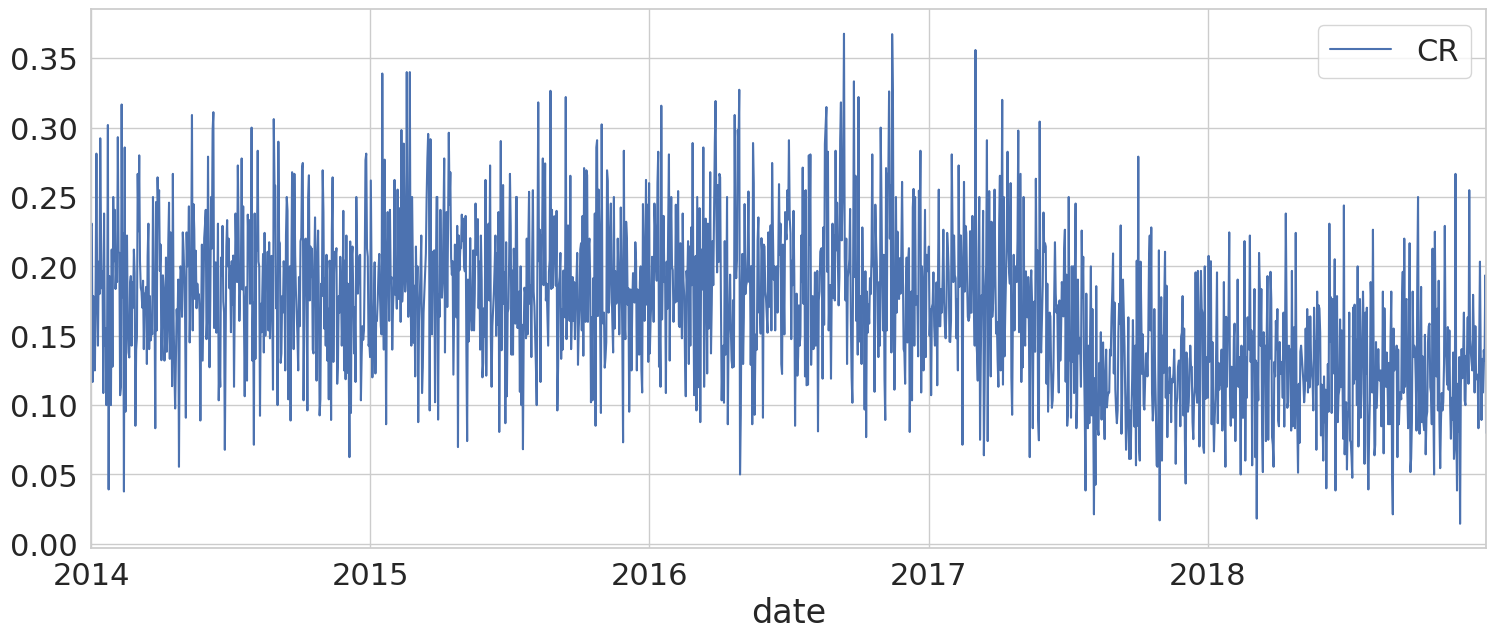

In [112]:
cr_by_day.plot()

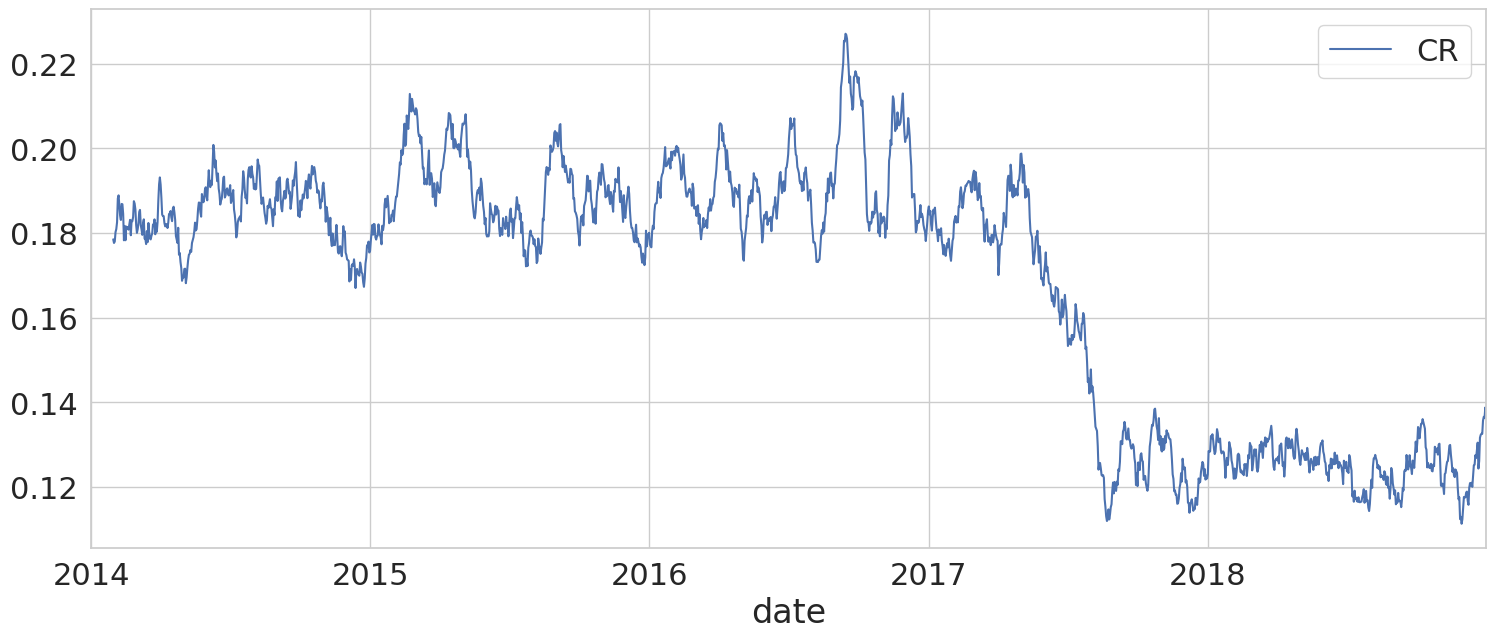

In [113]:
order_leads.groupby('date') \
.agg({'converted': 'mean'}) \
.rename(columns={'converted': 'CR'}) \
.sort_values('date') \
.rolling(30).mean().plot();

In [114]:
cr_by_day_rolling = order_leads.groupby('date') \
.agg({'converted': 'mean'}) \
.rename(columns={'converted': 'CR'}) \
.sort_values('date') \
.rolling(30).mean();

<ipython-input-115-cc321dd83a40>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{n:.2f}%' for n in ax.get_yticks()])


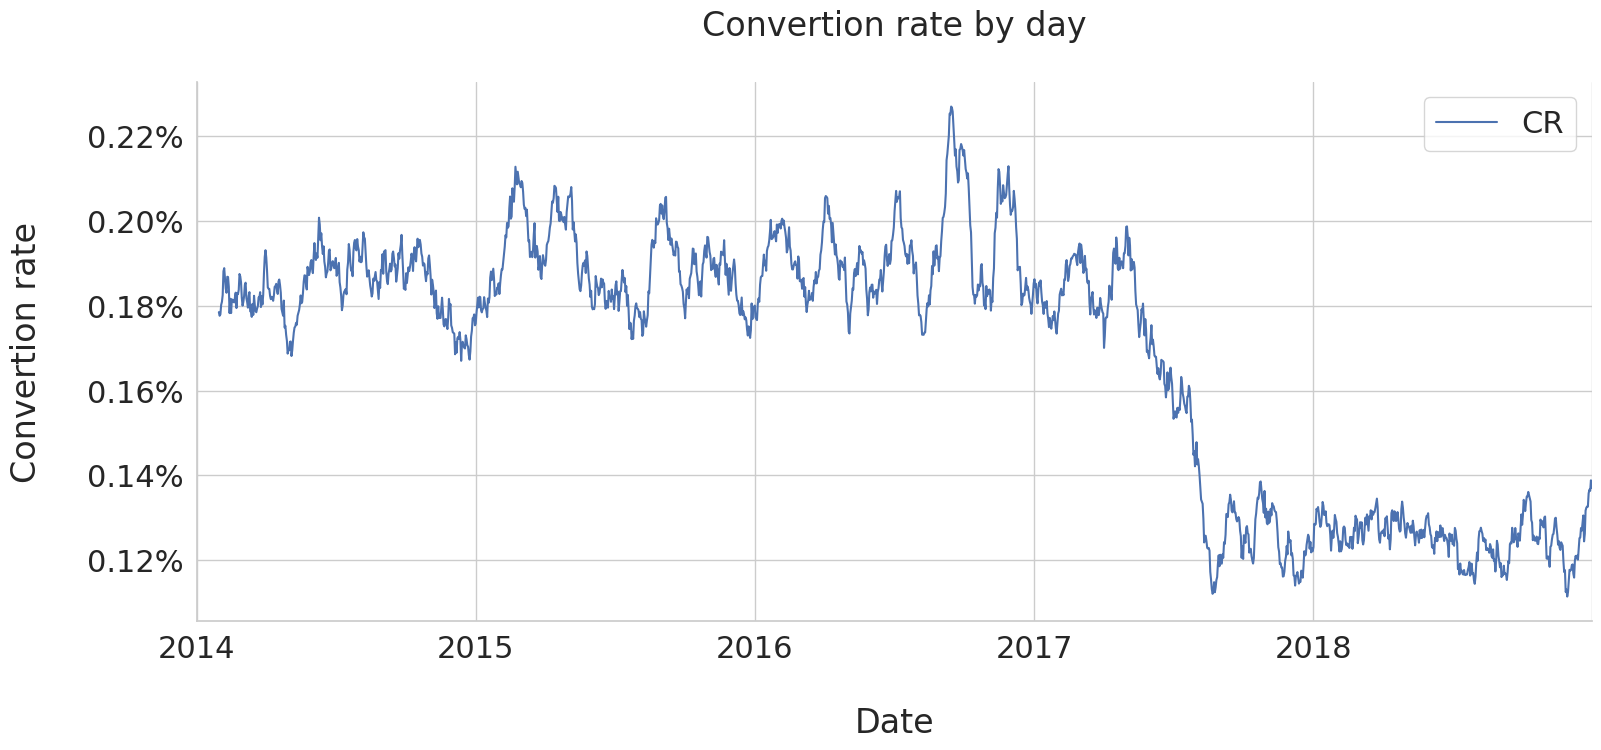

In [115]:
ax = cr_by_day_rolling.plot()
ax.set_title('Convertion rate by day\n')
ax.set_xlabel('\nDate')
ax.set_ylabel('Convertion rate\n')
ax.set_yticklabels([f'{n:.2f}%' for n in ax.get_yticks()])
sns.despine()

In [116]:
nums = [10, 20, 30, 40, 50, 70]

In [117]:
[f'{n:.2f}%' for n in nums]

['10.00%', '20.00%', '30.00%', '40.00%', '50.00%', '70.00%']

In [118]:
cr_by_day_rolling_ = cr_by_day_rolling.reset_index().dropna()

In [119]:
cr_by_day_rolling_.head()

,date,CR
29,2014-01-30,0.178512
30,2014-01-31,0.177663
31,2014-02-01,0.177996
32,2014-02-02,0.180229
33,2014-02-03,0.180944


In [122]:
fig = px.line(cr_by_day_rolling_, x='date', y='CR')
fig.show()

In [123]:
sales_team.head()

,Sales Rep,Sales Rep Id,Company Name,Company Id
0,William Taylor,ZTZA0ZLYZR85PTUJ,Melancholy Social-Role,D0AUXPP07H6AVSGD
1,William Taylor,ZTZA0ZLYZR85PTUJ,Pee-Wee Pigeon,TJW99R4RWH02INII
2,William Taylor,ZTZA0ZLYZR85PTUJ,Vaginal 36-Year-Old,3S20IO1O1DYXMUNU
3,William Taylor,ZTZA0ZLYZR85PTUJ,Unhurried Musician'S,FDWW0TQRPGMVI2A7
4,William Taylor,ZTZA0ZLYZR85PTUJ,Comprehensive Lists,C30FY83UNLVBA0O3


In [130]:
top_sales = order_leads_with_team_data.groupby('sales_rep', as_index=False) \
.agg({'converted': 'mean'}) \
.sort_values('converted', ascending=False).head(10)

In [135]:
all_sales = order_leads_with_team_data.groupby('sales_rep', as_index=False) \
.agg({'converted': 'mean'}) \
.sort_values('converted', ascending=False)

In [131]:
top_sales

,sales_rep,converted
151,Ginger Wright,0.368421
438,Sierra Garcia,0.363636
466,Thomas Fortner,0.352941
249,Katie Rodriquez,0.333333
225,Jose Gaines,0.326087
455,Teddy Cook,0.315789
187,Jason Miller,0.307692
468,Thomas Lindsey,0.304348
192,Jennifer Peck,0.304348
346,Nick Allen,0.298507


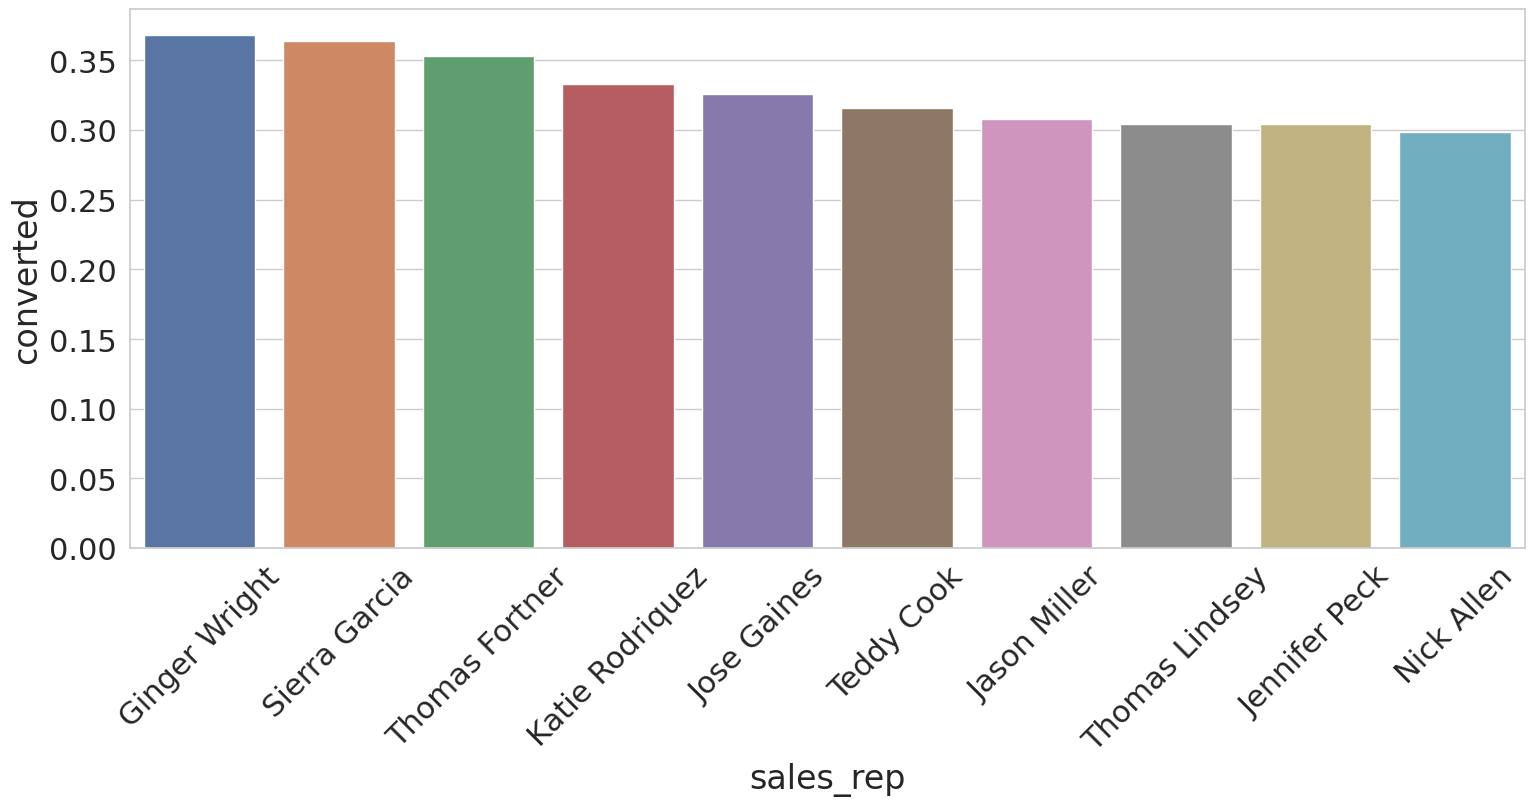

In [134]:
ax = sns.barplot(data=top_sales, x='sales_rep', y='converted')
ax.set_xticklabels(top_sales['sales_rep'], rotation=45);

<Axes: xlabel='converted', ylabel='Count'>

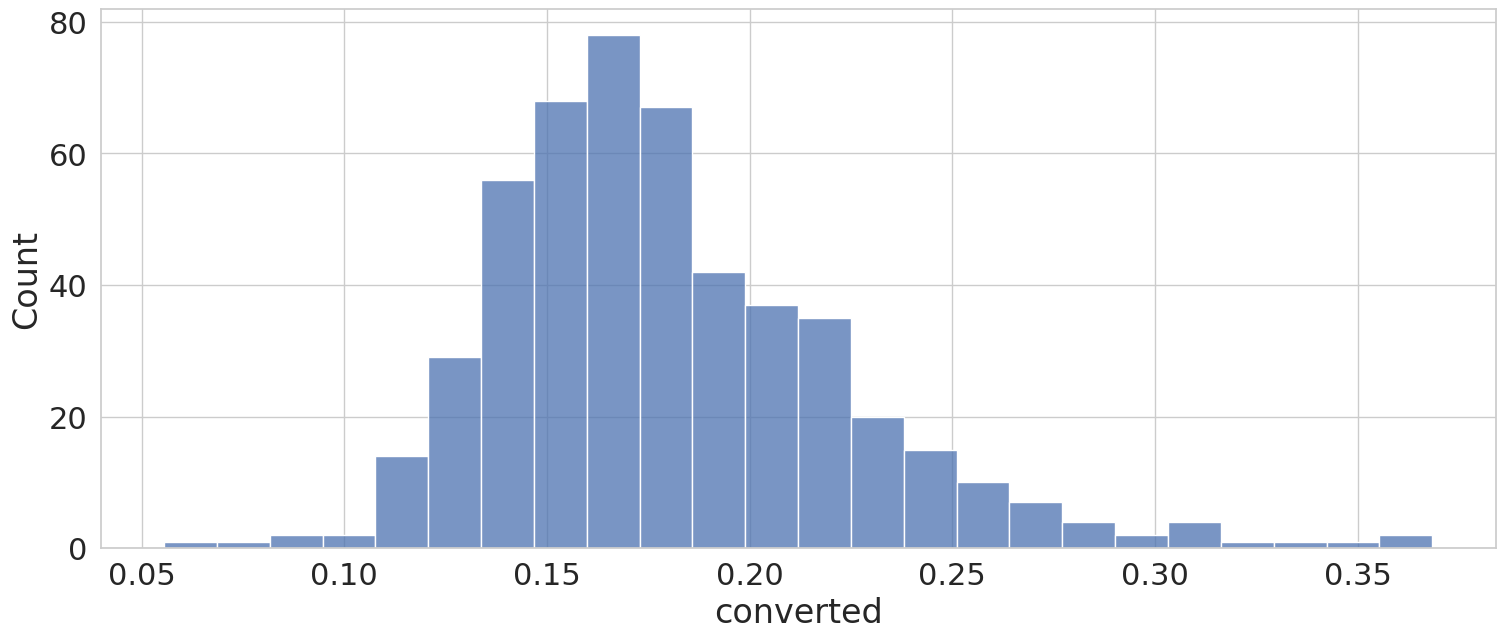

In [143]:
sns.histplot(all_sales['converted'])